**AIR QUALITY MONITORING**

**Background**

The objective of this project is to monitor and analyze the air quality trend in our environment specifically the Southeast Calgary area. Air quality readings were sourced from Calgary Region Airshed Zone (CRAZ) for the last 10 years (from 2014 - 2024) from the Calgary SE & Inglewood Craz's monitoring station.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Group_18_Project

/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Group_18_Project


In [4]:
import pandas as pd
import glob
import os

# Defining  the correct file path (relative to the python ipnyb file location
file_path = "/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Group_18_Project/craz air data"  # Using the relative path to the folder to extract all csv files
file_names = glob.glob(os.path.join(file_path, "*.csv"))  # Get all CSV files in the folder

if not file_names:
    print("No files found in the specified directory. Check the folder and try again.")
else:
    all_data = []
    for file in file_names:
        try:
            # Read each file, combining the 2nd and 3rd rows as column headers. This would be done to help track Calgry NG and Calgry SE
            df = pd.read_csv(file, header=[1, 2])  # Use multi-level header (rows 2 and 3)

            # Extract the year from the file name (e.g., "2014 hourly.csv")
            year = os.path.basename(file).split()[0]  # Extract the year from the file name
            df["Year"] = int(year)  # Add the year as a column

            # Flatten the multi-level column headers into single strings
            df.columns = ["_".join(filter(None, col)).strip() for col in df.columns]

            # Append the processed DataFrame to the list
            all_data.append(df)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue

    # Combine all files into a single DataFrame
    if all_data:
        merged_data = pd.concat(all_data, ignore_index=True)

        # Display the DataFrame in the notebook
        print("Data merged successfully. Displaying first 5 rows:")
        display(merged_data.head())  # Use display() to show the DataFrame in the notebook

        # Saving to a CSV file just to be sure of all the rows and columns not missing out.
        merged_data.to_csv("Merged_Air_Quality_Data.csv", index=False)
        print("Merged data saved as 'Merged_Air_Quality_Data.csv'.")
    else:
        print("No data could be processed.")

Data merged successfully. Displaying first 5 rows:


,Unnamed: 0_level_0_Unnamed: 0_level_1,Unnamed: 1_level_0_Unnamed: 1_level_1,CalIng_ NO,CalIng_ NO2,CalIng_ NOX,CalIng_ CO,CalIng_ O3,CalIng_ PM2.5,CalIng_ PM2.5.1,CalIng_ PM2.5S,...,CalVar_ NO2,CalVar_ NOX,CalVar_ CO,CalVar_ O3,CalVar_ PM2.5,CalVar_ PM2.5S,CalVar_ RH,CalVar_ WS,CalVar_ WD,Year
0,NaN,NaN,Ave,Ave,Ave,Ave,Ave,Ave,Ave,Ave,...,Ave,Ave,Ave,Ave,Ave,Ave,Ave,Ave,Ave,2014
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
3,NaN,NaN,BC,BC,BC,BC,BC,BC,BC,BC,...,BC,BC,BC,BC,BC,BC,BC,BC,BC,2014
4,1.0,01/01/2014 0:00,0.01426,0.03088,0.04524,0.326,0.00316,16.267,MS,MS,...,15.214,15.841,0.244,15.354,11.945,MS,96.434,8.809,301.803,2014


Merged data saved as 'Merged_Air_Quality_Data.csv'.


Data Cleaning
Step 2: Perform EDA - rename and drop some columns not required for the analysis

In [5]:
# Basic Analysis of the Merged Dataset

# Total number of rows and columns
total_rows, total_columns = merged_data.shape
print(f"Total Rows: {total_rows}, Total Columns: {total_columns}")


Total Rows: 95012, Total Columns: 36


In [6]:
# Column names in the dataset
print("\nColumn Names:")
print(merged_data.columns.tolist())


Column Names:
['Unnamed: 0_level_0_Unnamed: 0_level_1', 'Unnamed: 1_level_0_Unnamed: 1_level_1', 'CalIng_ NO', 'CalIng_ NO2', 'CalIng_ NOX', 'CalIng_ CO', 'CalIng_ O3', 'CalIng_ PM2.5', 'CalIng_ PM2.5.1', 'CalIng_ PM2.5S', 'CalIng_ ET', 'CalIng_ RH', 'CalIng_ WS', 'CalIng_ WD', 'CalSE_ SO2', 'CalSE_ NO', 'CalSE_ NO2', 'CalSE_ NOX', 'CalSE_ CO', 'CalSE_ O3', 'CalSE_ PM2.5', 'CalSE_ ET', 'CalSE_ RH', 'CalSE_ WS', 'CalSE_ WD', 'CalVar_ NO', 'CalVar_ NO2', 'CalVar_ NOX', 'CalVar_ CO', 'CalVar_ O3', 'CalVar_ PM2.5', 'CalVar_ PM2.5S', 'CalVar_ RH', 'CalVar_ WS', 'CalVar_ WD', 'Year']


In [7]:
# Commencing EDA, renaming some columns, and pick out key columns

# Clean and prepare the dataset, including removing the time from the DateTime column

# Remove first 3 rows, rename column 2 as date time, and pick the Inglewood (Callng) and SE (Calse)  monitoring station for analysis.

# Step 1: Copy the dataset for processing
cleaned_data = merged_data.copy()

# Drop the first 3 rows (assuming they are irrelevant)
cleaned_data = cleaned_data.iloc[4:].reset_index(drop=True)

# Step 2: Rename the 'Unnamed: 1_level_0_Unnamed: 1_level_1' column to 'DateTime'
cleaned_data.rename(columns={"Unnamed: 1_level_0_Unnamed: 1_level_1": "DateTime"}, inplace=True)

# Step 3: Remove the time from the 'DateTime' column, using dayfirst=True
cleaned_data["DateTime"] = pd.to_datetime(cleaned_data["DateTime"], dayfirst=True).dt.date

# Step 4: Select the required columns
columns_to_keep = [
    "DateTime", "CalIng_ NO", "CalIng_ NO2", "CalIng_ NOX", "CalIng_ CO",
    "CalIng_ O3", "CalIng_ PM2.5", "CalSE_ SO2", "CalSE_ NO", "CalSE_ NO2",
    "CalSE_ NOX", "CalSE_ CO", "CalSE_ O3", "CalSE_ PM2.5", "Year"
]
cleaned_data = cleaned_data[columns_to_keep]

# Display the cleaned dataset for review
print("Cleaned Dataset (First 5 Rows):")
display(cleaned_data.head())

Cleaned Dataset (First 5 Rows):


,DateTime,CalIng_ NO,CalIng_ NO2,CalIng_ NOX,CalIng_ CO,CalIng_ O3,CalIng_ PM2.5,CalSE_ SO2,CalSE_ NO,CalSE_ NO2,CalSE_ NOX,CalSE_ CO,CalSE_ O3,CalSE_ PM2.5,Year
0,2014-01-01,0.01426,0.03088,0.04524,0.326,0.00316,16.267,MS,MS,MS,MS,MS,MS,MS,2014
1,2014-01-01,0.01103,0.03099,0.04207,0.285,0.00454,8.501,MS,MS,MS,MS,MS,MS,MS,2014
2,2014-01-01,0.00513,0.02673,0.03186,0.255,0.009,10.164,MS,MS,MS,MS,MS,MS,MS,2014
3,2014-01-01,0.01019,0.03409,0.04433,0.383,0.00348,8.172,MS,MS,MS,MS,MS,MS,MS,2014
4,2014-01-01,0.01594,0.03588,0.05188,0.464,0.00193,7.305,MS,MS,MS,MS,MS,MS,MS,2014


In [8]:
# Check the structure of the cleaned dataset
print("\nCleaned Dataset Info:")
cleaned_data.info()


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95008 entries, 0 to 95007
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       94968 non-null  object
 1   CalIng_ NO     94988 non-null  object
 2   CalIng_ NO2    94988 non-null  object
 3   CalIng_ NOX    94988 non-null  object
 4   CalIng_ CO     94988 non-null  object
 5   CalIng_ O3     94988 non-null  object
 6   CalIng_ PM2.5  94988 non-null  object
 7   CalSE_ SO2     94988 non-null  object
 8   CalSE_ NO      94988 non-null  object
 9   CalSE_ NO2     94988 non-null  object
 10  CalSE_ NOX     94988 non-null  object
 11  CalSE_ CO      94988 non-null  object
 12  CalSE_ O3      94988 non-null  object
 13  CalSE_ PM2.5   94988 non-null  object
 14  Year           95008 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 10.9+ MB


In [9]:
# Save the cleaned data for future use
cleaned_data.to_csv("Cleaned_Air_Quality_Data.csv", index=False)
print("\nCleaned data saved as 'Cleaned_Air_Quality_Data.csv'.")


Cleaned data saved as 'Cleaned_Air_Quality_Data.csv'.


In [10]:
# Check for null values, missing values, and data types in the cleaned dataset

# Check for null values in each column
print("\nNull Values in Each Column:")
print(cleaned_data.isnull().sum())


Null Values in Each Column:
DateTime         40
CalIng_ NO       20
CalIng_ NO2      20
CalIng_ NOX      20
CalIng_ CO       20
CalIng_ O3       20
CalIng_ PM2.5    20
CalSE_ SO2       20
CalSE_ NO        20
CalSE_ NO2       20
CalSE_ NOX       20
CalSE_ CO        20
CalSE_ O3        20
CalSE_ PM2.5     20
Year              0
dtype: int64


In [11]:
import warnings
warnings.filterwarnings("ignore")

# Define the numerical columns explicitly
numerical_columns = [
    "CalIng_ NO", "CalIng_ NO2", "CalIng_ NOX", "CalIng_ CO", "CalIng_ O3", "CalIng_ PM2.5",
    "CalSE_ SO2", "CalSE_ NO", "CalSE_ NO2", "CalSE_ NOX", "CalSE_ CO", "CalSE_ O3", "CalSE_ PM2.5"
]

# Remove rows with missing DateTime values since median can't be applied to Datetime
cleaned_data = cleaned_data.dropna(subset=["DateTime"]).reset_index(drop=True)

# Ensure all numerical columns are filled with their respective medians
for col in numerical_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')  # Convert values to numeric if necessary
    cleaned_data[col].fillna(cleaned_data[col].median(), inplace=True)  # Fill NaN with the column median

# Check for any remaining missing values
print("\nRemaining Missing Values in Each Column After Cleaning:")
print(cleaned_data.isnull().sum())

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset (First 5 Rows):")
display(cleaned_data.head())



Remaining Missing Values in Each Column After Cleaning:
DateTime         0
CalIng_ NO       0
CalIng_ NO2      0
CalIng_ NOX      0
CalIng_ CO       0
CalIng_ O3       0
CalIng_ PM2.5    0
CalSE_ SO2       0
CalSE_ NO        0
CalSE_ NO2       0
CalSE_ NOX       0
CalSE_ CO        0
CalSE_ O3        0
CalSE_ PM2.5     0
Year             0
dtype: int64

Cleaned Dataset (First 5 Rows):


,DateTime,CalIng_ NO,CalIng_ NO2,CalIng_ NOX,CalIng_ CO,CalIng_ O3,CalIng_ PM2.5,CalSE_ SO2,CalSE_ NO,CalSE_ NO2,CalSE_ NOX,CalSE_ CO,CalSE_ O3,CalSE_ PM2.5,Year
0,2014-01-01,0.01426,0.03088,0.04524,0.326,0.00316,16.267,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
1,2014-01-01,0.01103,0.03099,0.04207,0.285,0.00454,8.501,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
2,2014-01-01,0.00513,0.02673,0.03186,0.255,0.00900,10.164,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
3,2014-01-01,0.01019,0.03409,0.04433,0.383,0.00348,8.172,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
4,2014-01-01,0.01594,0.03588,0.05188,0.464,0.00193,7.305,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014


**Step 3**:

#Exploratory Data Analysis

In [12]:
# Basic Statistics for Numerical Columns
print("\nSummary Statistics for Numerical Columns:")
print(cleaned_data.describe())



Summary Statistics for Numerical Columns:
         CalIng_ NO   CalIng_ NO2   CalIng_ NOX    CalIng_ CO    CalIng_ O3  \
count  94968.000000  94968.000000  94968.000000  94968.000000  94968.000000   
mean      -0.305518     -0.300766     -0.290362     -0.185413     -0.397997   
std       56.198467     56.198490     56.198558     64.893759     64.892137   
min    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%        0.000360      0.005280      0.006160      0.142000      0.010680   
50%        0.001390      0.010820      0.012760      0.183000      0.023290   
75%        0.006910      0.021480      0.028760      0.263000      0.033940   
max        0.336840      0.094100      0.424250      4.194000      0.087620   

       CalIng_ PM2.5    CalSE_ SO2     CalSE_ NO    CalSE_ NO2    CalSE_ NOX  \
count   94968.000000  94968.000000  94968.000000  94968.000000  94968.000000   
mean        7.047862     -0.315546     -0.309926     -0.303373     -0.297306   
std  

In [13]:
cleaned_data.head()

,DateTime,CalIng_ NO,CalIng_ NO2,CalIng_ NOX,CalIng_ CO,CalIng_ O3,CalIng_ PM2.5,CalSE_ SO2,CalSE_ NO,CalSE_ NO2,CalSE_ NOX,CalSE_ CO,CalSE_ O3,CalSE_ PM2.5,Year
0,2014-01-01,0.01426,0.03088,0.04524,0.326,0.00316,16.267,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
1,2014-01-01,0.01103,0.03099,0.04207,0.285,0.00454,8.501,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
2,2014-01-01,0.00513,0.02673,0.03186,0.255,0.00900,10.164,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
3,2014-01-01,0.01019,0.03409,0.04433,0.383,0.00348,8.172,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014
4,2014-01-01,0.01594,0.03588,0.05188,0.464,0.00193,7.305,0.0002,0.00121,0.0089,0.01068,0.181,0.02412,5.402,2014


Visualize Distributions

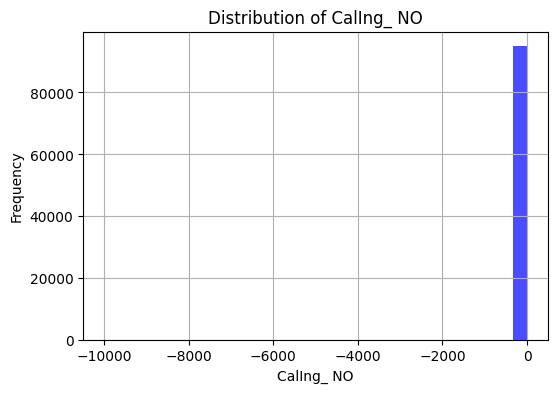

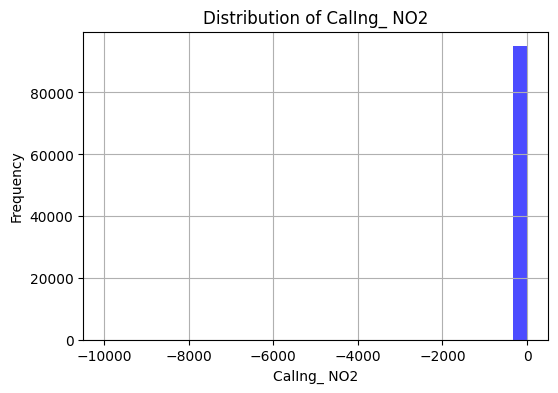

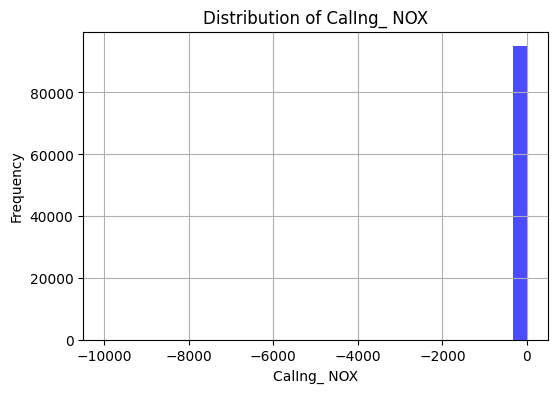

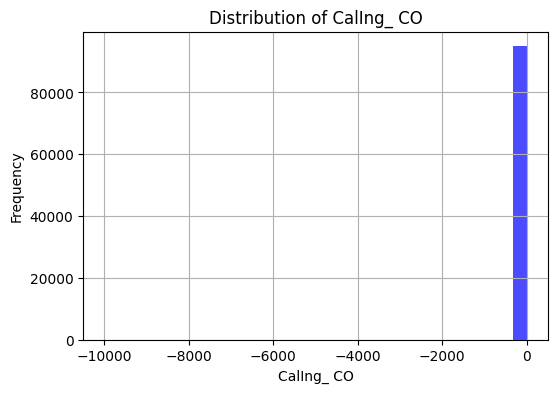

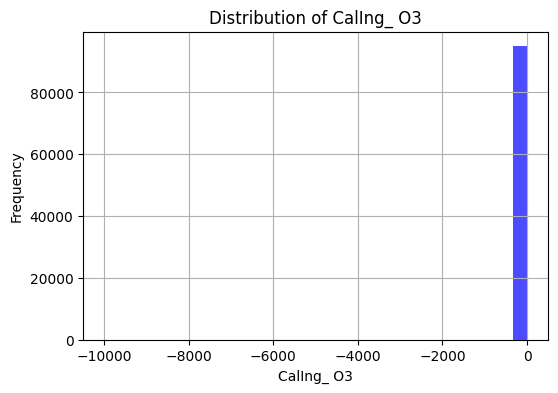

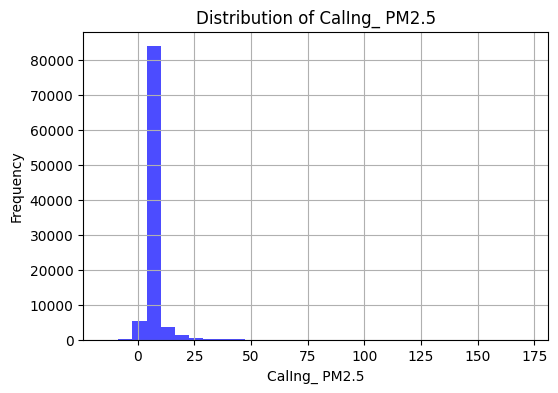

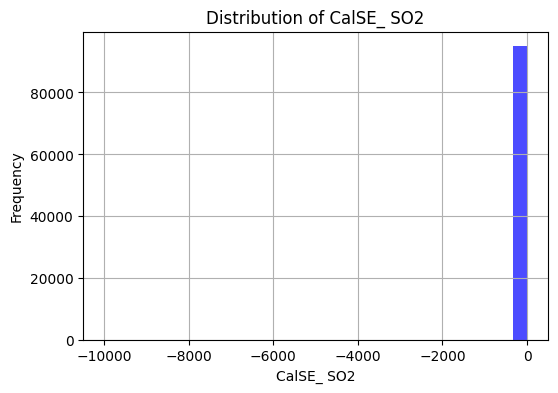

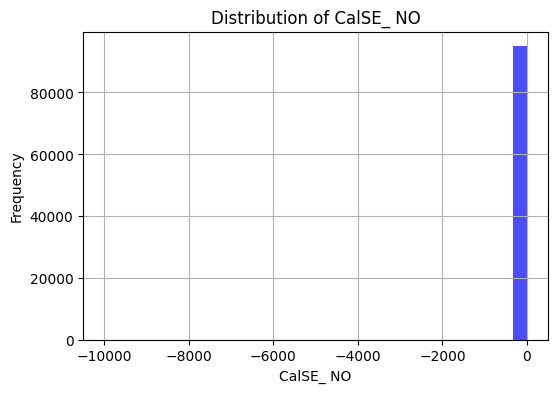

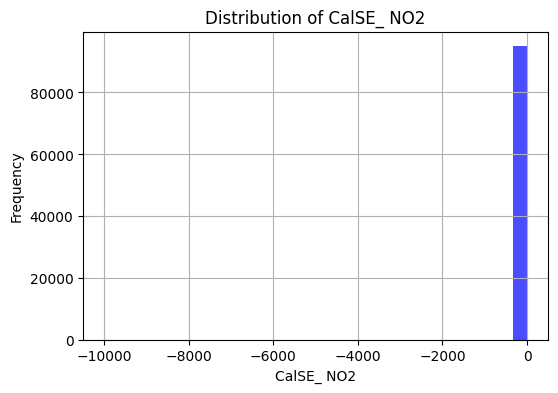

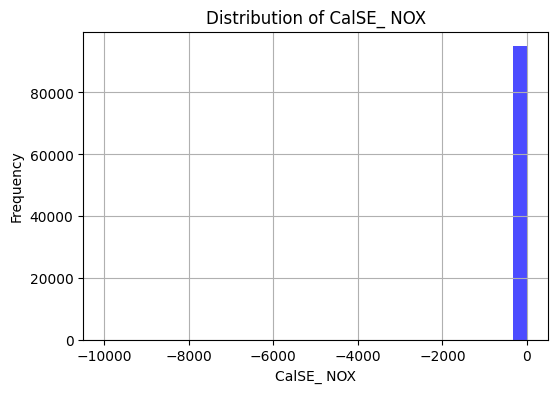

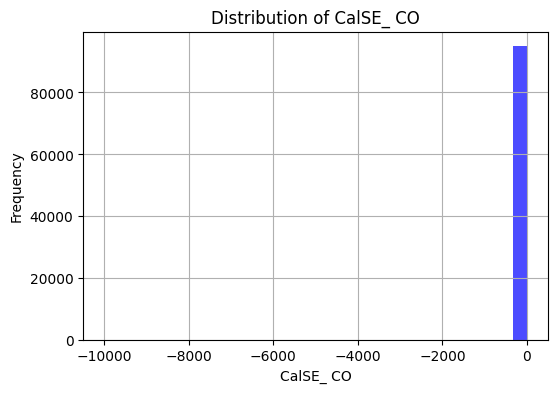

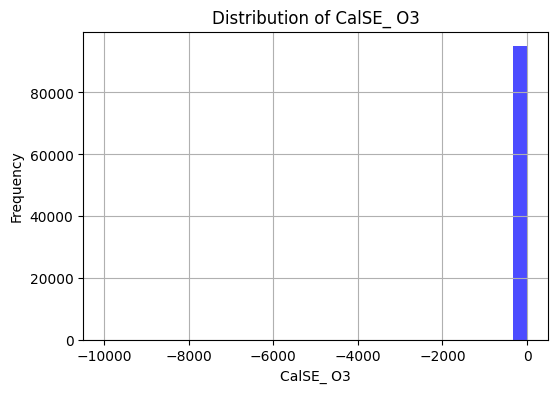

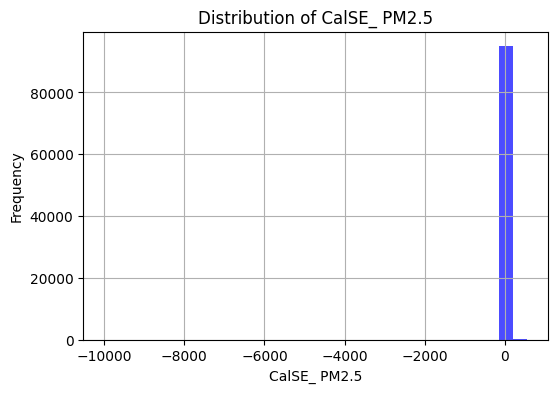

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    cleaned_data[col].hist(bins=30, alpha=0.7, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
